# Assignment 1 for FIT5212, Semester 1, 2020

**Student Name:**  Hitesh Get

**Student ID:**    29637333

# Task1:Text Classification

## 1.1 Using Machine Learning Method

### 1.1.1 Importing the required packages

In [2]:
import os
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize    
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn

In [3]:
os.getcwd()

'C:\\Users\\61470\\Downloads\\FIT5212\\Assignment 1'

### 1.1.2 Text Preprocessing

In [4]:
# Reading the train file
df_assignment = pd.read_csv('assignment1_data/axcs_train.csv')

In [5]:
# Reading the test file
df_assignment_test = pd.read_csv('assignment1_data/axcs_test.csv').dropna()

In [6]:
df_assignment_test.head()

,ID,URL,Date,Title,InfoTheory,CompVis,Math,Abstract
0,no-150100335,arxiv.org/abs/1501.00335,2015-01-01,A Data Transparency Framework for Mobile Appli...,0.0,0.0,0.0,A Data Transparency Framework for Mobile Appl...
1,no-14024178,arxiv.org/abs/1402.4178,2015-01-01,A reclaimer scheduling problem arising in coal...,0.0,0.0,0.0,A reclaimer scheduling problem arising in coa...
2,no-150100263,arxiv.org/abs/1501.00263,2015-01-01,Communication-Efficient Distributed Optimizati...,0.0,0.0,1.0,Communication-Efficient Distributed Optimizat...
3,no-150100287,arxiv.org/abs/1501.00287,2015-01-01,Consistent Classification Algorithms for Multi...,0.0,0.0,0.0,Consistent Classification Algorithms for Mult...
4,no-11070586,arxiv.org/abs/1107.0586,2015-01-01,Managing key multicasting through orthogonal s...,0.0,0.0,0.0,Managing key multicasting through orthogonal ...


In [7]:
df_assignment.head()

,ID,URL,Date,Title,InfoTheory,CompVis,Math,Abstract
0,cs-9301111,arxiv.org/abs/cs/9301111,1989-12-31,Nested satisfiability,0,0,0,Nested satisfiability A special case of the s...
1,cs-9301112,arxiv.org/abs/cs/9301112,1990-03-31,A note on digitized angles,0,0,0,A note on digitized angles We study the confi...
2,cs-9301113,arxiv.org/abs/cs/9301113,1991-07-31,Textbook examples of recursion,0,0,0,Textbook examples of recursion We discuss pro...
3,cs-9301114,arxiv.org/abs/cs/9301114,1991-10-31,Theory and practice,0,0,0,Theory and practice The author argues to Sili...
4,cs-9301115,arxiv.org/abs/cs/9301115,1991-11-30,Context-free multilanguages,0,0,0,Context-free multilanguages This article is a...


In [8]:
# Dropping unnecessary columns
df_assignment.drop(df_assignment.columns[[1,2,3]],axis = 1,inplace = True)

In [9]:
# downloading wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\61470\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# importing train test split
from sklearn.model_selection import train_test_split

In [11]:
# Splitting the train data for infoTheory further into train and test split
X_train_info, X_test_info, y_train_info, y_test_info = train_test_split(df_assignment['Abstract'], 
                                                    df_assignment['InfoTheory'], 
                                                    test_size=0.20, 
                                                    random_state=8)

In [12]:
# Storing the features and target in different variables
X_test_1 = df_assignment_test['Abstract']
y_test_info_1 = df_assignment_test['InfoTheory']

In [13]:
#Storing target label to another variable
y_test_comp_1 = df_assignment_test['CompVis']

In [14]:
##Storing target label to another variable
y_test_math_1 = df_assignment_test['Math']

In [15]:
# Splitting the train data for CompVis further into train and test split
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(df_assignment['Abstract'], 
                                                    df_assignment['CompVis'], 
                                                    test_size=0.20, 
                                                    random_state=8)

In [16]:
# Splitting the train data for Math further into train and test split
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(df_assignment['Abstract'], 
                                                    df_assignment['Math'], 
                                                    test_size=0.20, 
                                                    random_state=8)

#### Defining Lemmatizer function 

In [17]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl=WordNetLemmatizer()
    def __call__(self,doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [18]:
# Creating vectorizer using tfidf for text-preprocessing
vectorizer=TfidfVectorizer(analyzer='word',input='content',
                           lowercase=True,
                           token_pattern='(?u)\\b\\w\\w+\\b',
                           min_df=3,
                           ngram_range=(1,2),
                           tokenizer=LemmaTokenizer())

In [21]:
X_train_info

25486     Distributional Measures as Proxies for Semant...
20502     Sparse Support Recovery with Phase-Only Measu...
10222     Finding matching initial states for equivalen...
18328     An Improved Multiple Faults Reassignment base...
8833      Lectures on Probability, Entropy, and Statist...
                               ...                        
10376     Language Diversity across the Consonant Inven...
34949     Delay and Delay Variation Constrained Algorit...
18417     The Capacity Region of p-Transmitter/q-Receiv...
25940     Conflict-free graph orientations with parity ...
4547      Extending the theory of Owicki and Gries with...
Name: Abstract, Length: 43784, dtype: object

In [22]:
y_train_info

25486    0
20502    1
10222    0
18328    0
8833     1
        ..
10376    0
34949    0
18417    1
25940    0
4547     0
Name: InfoTheory, Length: 43784, dtype: int64

In [23]:
#Using vectorizer on the train data for infotheory label
features_train_info=vectorizer.fit_transform(X_train_info)
labels_train_info=np.asarray(y_train_info)

In [24]:
#Fitting vectorizer on the train data for compvis label
features_train_comp=vectorizer.fit_transform(X_train_comp)
labels_train_comp=np.asarray(y_train_comp)

In [25]:
#Fitting vectorizer on the train data for math label
features_train_math=vectorizer.fit_transform(X_train_math)
labels_train_math=np.asarray(y_train_math)

In [27]:
labels_train_info

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
#Getting the length of the features
len(vectorizer.get_feature_names())

259285

In [32]:
vectorizer.get_feature_names()

['!',
 '! )',
 '! ,',
 '! :',
 '! =',
 '! =np',
 '! a',
 '! and',
 '! in',
 '! possible',
 '! the',
 '! this',
 '! we',
 '! }',
 '#',
 '# ,',
 '# .',
 '# 64257',
 '# 8211',
 '# 8217',
 '# and',
 '# bi',
 '# csp',
 '# csps',
 '# p',
 '# p-complete',
 '# p-hard',
 '# rhpi_1',
 '# sat',
 '$',
 '$ $',
 '$ ,',
 '$ .',
 '$ are',
 '$ is',
 '$ {',
 '%',
 '% (',
 '% )',
 '% +/-',
 '% ,',
 '% -',
 '% -30',
 '% .',
 '% ;',
 '% a',
 '% accuracy',
 '% accurate',
 '% and',
 '% are',
 '% at',
 '% average',
 '% better',
 '% by',
 '% can',
 '% character',
 '% classification',
 '% compared',
 '% confidence',
 '% correct',
 '% coverage',
 '% depending',
 '% drop',
 '% efficiency',
 '% energy',
 '% enhancement',
 '% error',
 '% even',
 '% false',
 '% faster',
 '% for',
 '% from',
 '% gain',
 '% have',
 '% higher',
 '% improvement',
 '% in',
 '% increase',
 '% is',
 '% le',
 '% lesser',
 '% level',
 '% lower',
 '% more',
 '% most',
 '% of',
 '% on',
 '% only',
 '% or',
 '% over',
 '% overhead',
 '% overlap

### 1.1.3 Model Selection

#### Performing 10 fold cross validation to check which model performs comparitively better

C:\Users\61470\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\61470\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61470\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61470\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61470\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default

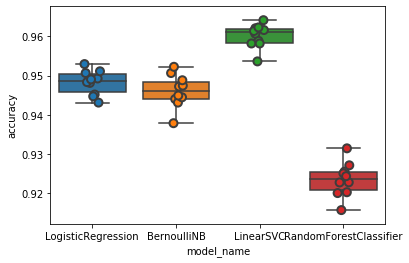

In [34]:
# Creating a list of available models
models = [
    LogisticRegression(),
     BernoulliNB(),
     LinearSVC(),
    RandomForestClassifier()
]
#Setting a value for cross validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
#Iterating through different models to calculate accuracies
for model in models:
     model_name = model.__class__.__name__
     accuracies = cross_val_score(model, features_train_info, labels_train_info, scoring='accuracy', cv=CV)
     for fold_idx, accuracy in enumerate(accuracies):
          entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Plotting boxplot for multiple models based on their accuracy
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [36]:
# Using the vectorizer to transform the features and label of validation set
features_test_info=vectorizer.transform(X_test_info)
labels_test_info=np.asarray(y_test_info)

In [37]:
# Using the vectorizer to transform the features and label of test set
features_test_info_1=vectorizer.transform(X_test_1)
labels_test_info_1=np.asarray(y_test_info_1)

In [38]:
# Using the vectorizer to transform the features and label of validation set
features_test_comp=vectorizer.transform(X_test_comp)
labels_test_comp=np.asarray(y_test_comp)

In [39]:
# Using the vectorizer to transform the features and label of test set
features_test_comp_1=vectorizer.transform(X_test_1)
labels_test_comp_1=np.asarray(y_test_comp_1)

In [40]:
# Using the vectorizer to transform the features and label of validation set
features_test_math=vectorizer.transform(X_test_math)
labels_test_math=np.asarray(y_test_math)

In [41]:
# Using the vectorizer to transform the features and label of test set
features_test_math_1=vectorizer.transform(X_test_1)
labels_test_math_1=np.asarray(y_test_math_1)

### 1.1.3 Model Training and Prediction

#### Training SVC model on the validation data and predicting accuracies for infoTheory

In [44]:
#Using LinearSVC model for training
models = [
    #LogisticRegression(),
    #BernoulliNB(),
    LinearSVC(),
    #RandomForestClassifier()
]

for clf in models:
    model_name = clf.__class__.__name__
    # Fitting the model
    clf.fit(features_train_info, labels_train_info)
    print("Confusion matrix and scores for InfoTheory Validation Data")
    print(model_name)
    # Doing the prediction
    y_predict_info=clf.predict(features_test_info)
    # Calculating Confusion Matrix
    print(confusion_matrix(labels_test_info,y_predict_info))
    # Calculating Recall
    recall_info=recall_score(labels_test_info,y_predict_info,average='macro')
    # Calculating Precision
    precision_info=precision_score(labels_test_info,y_predict_info,average='macro')
    # Calculating F1 score
    f1score_info=f1_score(labels_test_info,y_predict_info,average='macro')
    # Calcualting Accuracy
    accuracy_info=accuracy_score(labels_test_info,y_predict_info)
    # Calculating Mathews Correlation coefficient
    matthews_info = matthews_corrcoef(labels_test_info,y_predict_info) 
    print('Accuracy: '+ str(accuracy_info))
    print('Macro Precision: '+ str(precision_info))
    print('Macro Recall: '+ str(recall_info))
    print('Macro F1 score:'+ str(f1score_info))
    print('MCC:'+ str(matthews_info))

Confusion matrix and scores for InfoTheory Validation Data
LinearSVC
[[8719  126]
 [ 287 1815]]
Accuracy: 0.9622727687951037
Macro Precision: 0.9516086819674743
Macro Recall: 0.9246090159362614
Macro F1 score:0.9373560869025019
MCC:0.8758016168938746


#### Training SVC model on the test data and predicting accuracies for infoTheory

In [45]:
#Using LinearSVC model for training
models = [
    #LogisticRegression(),
    #BernoulliNB(),
    LinearSVC(),
    #RandomForestClassifier()
]

for clf in models:
    model_name = clf.__class__.__name__
    # Fitting the model
    clf.fit(features_train_info, labels_train_info)
    print("Confusion matrix and scores for InfoTheory Test Data")
    print(model_name)
    # Doing the prediction
    y_predict_info_1=clf.predict(features_test_info_1)
    # Calculating confusion matrix
    print(confusion_matrix(labels_test_info_1,y_predict_info_1))
    #Calculating recall
    recall_info_1=recall_score(labels_test_info_1,y_predict_info_1,average='macro')
    # Calculating Precision
    precision_info_1=precision_score(labels_test_info_1,y_predict_info_1,average='macro')
    # Calculating F1 score
    f1score_info_1=f1_score(labels_test_info_1,y_predict_info_1,average='macro')
    # Calculating Accuracy
    accuracy_info_1=accuracy_score(labels_test_info_1,y_predict_info_1)
    # Calculating Matthews Correlatin coefficient
    matthews_info_1 = matthews_corrcoef(labels_test_info_1,y_predict_info_1) 
    print('Accuracy: '+ str(accuracy_info_1))
    print('Macro Precision: '+ str(precision_info_1))
    print('Macro Recall: '+ str(recall_info_1))
    print('Macro F1 score:'+ str(f1score_info_1))
    print('MCC:'+ str(matthews_info_1))

Confusion matrix and scores for InfoTheory Test Data
LinearSVC
[[15829   233]
 [  642  2974]]
Accuracy: 0.9555340989938002
Macro Precision: 0.9441844163482087
Macro Recall: 0.9039747320394533
Macro F1 score:0.9224307620696655
MCC:0.8472054781937344


#### Training SVC model on the validation data and predicting accuracies for CompVis

In [46]:
models = [
    #LogisticRegression(),
    #BernoulliNB(),
    LinearSVC(),
    #RandomForestClassifier()
]

for clf in models:
    model_name = clf.__class__.__name__
    # Fitting the model
    clf.fit(features_train_comp, labels_train_comp)
    print("Confusion matrix and scores for CompVis Validation Data")
    print(model_name)
    # Doing the prediction
    y_predict_comp=clf.predict(features_test_comp)
    # Calculating Confusion Matrix
    print(confusion_matrix(labels_test_comp,y_predict_comp))
    # Calculating Recall
    recall_comp=recall_score(labels_test_comp,y_predict_comp,average='macro')
    # Calculating Precision
    precision_comp=precision_score(labels_test_comp,y_predict_comp,average='macro')
    # Calculating F1 Score
    f1score_comp=f1_score(labels_test_comp,y_predict_comp,average='macro')
    # Calculating Accuracy
    accuracy_comp=accuracy_score(labels_test_comp,y_predict_comp)
    # Calculating Matthews correlation coefficient
    matthews_comp = matthews_corrcoef(labels_test_comp,y_predict_comp) 
    print('Accuracy: '+ str(accuracy_comp))
    print('Macro Precision: '+ str(precision_comp))
    print('Macro Recall: '+ str(recall_comp))
    print('Macro F1 score:'+ str(f1score_comp))
    print('MCC:'+ str(matthews_comp))

Confusion matrix and scores for CompVis Validation Data
LinearSVC
[[10476    47]
 [  124   300]]
Accuracy: 0.9843792819950672
Macro Precision: 0.9264276004567451
Macro Recall: 0.8515403814465707
Macro F1 score:0.8850573378715108
MCC:0.7743552707224509


#### Training SVC model on the test data and predicting accuracies for infoTheory

In [47]:
models = [
    #LogisticRegression(),
    #BernoulliNB(),
    LinearSVC(),
    #RandomForestClassifier()
]

for clf in models:
    model_name = clf.__class__.__name__
    # Fitting the Model
    clf.fit(features_train_comp, labels_train_comp)
    print("Confusion matrix and scores for CompVis Test Data")
    print(model_name)
    # Doing the prediction
    y_predict_comp_1=clf.predict(features_test_comp_1)
    # Calculating Confusion Matrix
    print(confusion_matrix(labels_test_comp_1,y_predict_comp_1))
    # Calculating Recall
    recall_comp_1=recall_score(labels_test_comp_1,y_predict_comp_1,average='macro')
    # Calcualting Precision
    precision_comp_1=precision_score(labels_test_comp_1,y_predict_comp_1,average='macro')
    # Calculating F1 Score
    f1score_comp_1=f1_score(labels_test_comp_1,y_predict_comp_1,average='macro')
    # Calculating Accuracy
    accuracy_comp_1=accuracy_score(labels_test_comp_1,y_predict_comp_1)
    # Calculating Matthews Correlation coeffiecient
    matthews_comp_1 = matthews_corrcoef(labels_test_comp_1,y_predict_comp_1) 
    print('Accuracy: '+ str(accuracy_comp_1))
    print('Macro Precision: '+ str(precision_comp_1))
    print('Macro Recall: '+ str(recall_comp_1))
    print('Macro F1 score:'+ str(f1score_comp_1))
    print('MCC:'+ str(matthews_comp_1))

Confusion matrix and scores for CompVis Test Data
LinearSVC
[[17447    79]
 [  506  1646]]
Accuracy: 0.9702713690415693
Macro Precision: 0.9630090970222569
Macro Recall: 0.880181149875257
Macro F1 score:0.9163107548142329
MCC:0.8391122235044037


#### Training SVC model on the validation data and predicting accuracies for Math label

In [48]:
models = [
    #LogisticRegression(),
    #BernoulliNB(),
    LinearSVC(),
    #RandomForestClassifier()
]

for clf in models:
    model_name = clf.__class__.__name__
    # Fitting the model
    clf.fit(features_train_math, labels_train_math)
    print("Confusion matrix and scores for Math Validation Data")
    print(model_name)
    # Doing the prediction
    y_predict_math=clf.predict(features_test_math)
    # Calculating confusion matrix
    print(confusion_matrix(labels_test_math,y_predict_math))
    # Calculating recall
    recall_math=recall_score(labels_test_math,y_predict_math,average='macro')
    # Calculating Precision
    precision_math=precision_score(labels_test_math,y_predict_math,average='macro')
    # Calculating F1 Score
    f1score_math=f1_score(labels_test_math,y_predict_math,average='macro')
    # Calcualting F1 Score
    accuracy_math=accuracy_score(labels_test_math,y_predict_math)
    # Calcualting Matthews Correlation Coefficient
    matthews_math = matthews_corrcoef(labels_test_math,y_predict_math) 
    print('Accuracy: '+ str(accuracy_math))
    print('Macro Precision: '+ str(precision_math))
    print('Macro Recall: '+ str(recall_math))
    print('Macro F1 score:'+ str(f1score_math))
    print('MCC:'+ str(matthews_math))

Confusion matrix and scores for Math Validation Data
LinearSVC
[[7203  431]
 [ 714 2599]]
Accuracy: 0.8954051338266191
Macro Precision: 0.8837850495924924
Macro Recall: 0.8640137047148202
Macro F1 score:0.8729286710310289
MCC:0.7475373374389379


#### Training SVC model on the test data and predicting accuracies for Math label

In [49]:
models = [
    #LogisticRegression(),
    #BernoulliNB(),
    LinearSVC(),
    #RandomForestClassifier()
]

for clf in models:
    model_name = clf.__class__.__name__
    # Fitting the model
    clf.fit(features_train_math, labels_train_math)
    print("Confusion matrix and scores for Math Test Data")
    print(model_name)
    # Doing the prediction
    y_predict_math_1=clf.predict(features_test_math_1)
    # Calculating Confusion Matrix
    print(confusion_matrix(labels_test_math_1,y_predict_math_1))
    # Calculating Recall
    recall_math_1=recall_score(labels_test_math_1,y_predict_math_1,average='macro')
    # Calculating Precision
    precision_math_1=precision_score(labels_test_math_1,y_predict_math_1,average='macro')
    # Calculating F1 Score
    f1score_math_1=f1_score(labels_test_math_1,y_predict_math_1,average='macro')
    # Calcualting Accuracy
    accuracy_math_1=accuracy_score(labels_test_math_1,y_predict_math_1)
    # Calculating Matthews Correlation Coefficient
    matthews_math_1 = matthews_corrcoef(labels_test_math_1,y_predict_math_1) 
    print('Accuracy: '+ str(accuracy_math_1))
    print('Macro Precision: '+ str(precision_math_1))
    print('Macro Recall: '+ str(recall_math_1))
    print('Macro F1 score:'+ str(f1score_math_1))
    print('MCC:'+ str(matthews_math_1))

Confusion matrix and scores for Math Test Data
LinearSVC
[[12823   925]
 [ 1445  4485]]
Accuracy: 0.8795609309889216
Macro Precision: 0.863872375497928
Macro Recall: 0.8445206317914217
Macro F1 score:0.8532053867933365
MCC:0.708128634353933


## 1.2 Using Neural Networks(RNN Model)

### 1.2.1  Text Pre Preprocessing

In [2]:
import torch
from torchtext import data

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Using text for abstract processing using spacy
TEXT = data.Field(sequential=True, tokenize = 'spacy', lower=True)
# Using label for target label processing
LABEL = data.LabelField(dtype = torch.float, use_vocab=False, preprocessing=int)

In [45]:
df_assignment.head()

,ID,URL,Date,Title,InfoTheory,CompVis,Math,Abstract
0,cs-9301111,arxiv.org/abs/cs/9301111,1989-12-31,Nested satisfiability,0,0,0,Nested satisfiability A special case of the s...
1,cs-9301112,arxiv.org/abs/cs/9301112,1990-03-31,A note on digitized angles,0,0,0,A note on digitized angles We study the confi...
2,cs-9301113,arxiv.org/abs/cs/9301113,1991-07-31,Textbook examples of recursion,0,0,0,Textbook examples of recursion We discuss pro...
3,cs-9301114,arxiv.org/abs/cs/9301114,1991-10-31,Theory and practice,0,0,0,Theory and practice The author argues to Sili...
4,cs-9301115,arxiv.org/abs/cs/9301115,1991-11-30,Context-free multilanguages,0,0,0,Context-free multilanguages This article is a...


In [46]:
os.getcwd()

'C:\\Users\\61470\\Downloads\\FIT5212\\Assignment 1'

### 1.2.2 Creating train and validation split from train data

In [10]:
df_assignment_rnn_train,df_assignment_rnn_test = np.split(df_assignment, [int(.8*len(df_assignment))])

In [49]:
len(df_assignment_rnn_train)

43784

In [50]:
len(df_assignment_rnn_test)

10947

In [11]:
# Exporting the train file
df_assignment_rnn_train.to_csv('df_assignment_rnn_train.csv', index=False)

In [12]:
# Exporting the validation file
df_assignment_rnn_test.to_csv('df_assignment_rnn_test.csv', index=False)

In [55]:
# Exporting the test file
df_assignment_test.to_csv('df_assignment_test.csv', index=False)

#### 1.2.3 Extracting the TEXT and LABEL for InfoTheory and creating train,validation and test splits

In [62]:
from torchtext.data import TabularDataset


df_datafields_info = [("ID", None),
                 ("URL", None),
                 ("Date", None),
                 ("Title", None),
                 ("InfoTheory", LABEL),
                 ("CompVis",None),
                 ("Math",None),
                 ("Abstract", TEXT)]

train_data_info, valid_data_info, test_data_info = TabularDataset.splits(
    path='.', train='df_assignment_rnn_train.csv',
    validation='df_assignment_rnn_test.csv', test= 'df_assignment_test.csv', format='csv',skip_header=True,
    fields=df_datafields_info)

#### 1.2.4 Extracting the TEXT and LABEL for CompVis and creating train,validation and test splits

In [105]:
from torchtext.data import TabularDataset


df_datafields_comp = [("ID", None),
                 ("URL", None),
                 ("Date", None),
                 ("Title", None),
                 ("InfoTheory", None),
                 ("CompVis",LABEL),
                 ("Math",None),
                 ("Abstract", TEXT)]

train_data_comp, valid_data_comp, test_data_comp = TabularDataset.splits(
    path='.', train='df_assignment_rnn_train.csv',
    validation='df_assignment_rnn_test.csv', test='df_assignment_test.csv', format='csv',skip_header=True,
    fields=df_datafields_comp)

#### 1.2.5 Extracting the TEXT and LABEL for Math and creating train,validation and test splits

In [106]:
from torchtext.data import TabularDataset


df_datafields_math = [("ID", None),
                 ("URL", None),
                 ("Date", None),
                 ("Title", None),
                 ("InfoTheory", None),
                 ("CompVis",None),
                 ("Math",LABEL),
                 ("Abstract", TEXT)]

train_data_math, valid_data_math, test_data_math = TabularDataset.splits(
    path='.', train='df_assignment_rnn_train.csv',
    validation='df_assignment_rnn_test.csv', test='df_assignment_test.csv', format='csv',skip_header=True,
    fields=df_datafields_math)

In [63]:
print(f'Number of training examples: {len(train_data_info)}')
print(f'Number of validation examples: {len(valid_data_info)}')
print(f'Number of testing examples: {len(test_data_info)}')

Number of training examples: 43784
Number of validation examples: 10947
Number of testing examples: 19678


In [ ]:
print(vars(train_data_info.examples[0]))

#### 1.2.6 Buidilng the vocabulary

In [64]:
# Declaring the maximum vocab size
MAX_VOCAB_SIZE = 5400

TEXT.build_vocab(train_data_info, max_size = MAX_VOCAB_SIZE)

In [65]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")

Unique tokens in TEXT vocabulary: 5402


In [66]:
print(TEXT.vocab.freqs.most_common(20))

[('the', 406233), ('of', 273642), ('.', 262942), (',', 240903), ('a', 173488), ('and', 168360), ('-', 145021), ('to', 138574), ('in', 137699), ('is', 104033), ('for', 95641), ('we', 86740), ('that', 70786), ('this', 58998), ('on', 53857), ('with', 52488), ('are', 46001), (' ', 43784), (')', 39567), ('an', 39506)]


In [67]:
print(TEXT.vocab.itos[:10])
print(LABEL)

['<unk>', '<pad>', 'the', 'of', '.', ',', 'a', 'and', '-', 'to']


#### 1.2.7 Creating the iterators

In [68]:
# Setting the batch size
BATCH_SIZE = 16

# Handling the device to put iterators on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Splitting and creating iterators for train,validation and test data for InfoTheory
train_iterator_info, valid_iterator_info, test_iterator_info = data.BucketIterator.splits(
    (train_data_info, valid_data_info, test_data_info), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

In [69]:
batch = next(train_iterator_info.__iter__())
batch


[torchtext.data.batch.Batch of size 16]
	[.InfoTheory]:[torch.FloatTensor of size 16]
	[.Abstract]:[torch.LongTensor of size 258x16]

#### 1.2.8 Building the model

In [35]:
import torch.nn as nn


class RNN(nn.Module):
    # Creating a function for embedding layers, RNN and linear layer
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    # Creating a forward function to feed exmaples in the model    
    def forward(self, text):

        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        return self.fc(hidden.squeeze(0))

In [36]:
# Declaring the model parameters
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [37]:
# Creating a function to see number of trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 632,105 trainable parameters


In [38]:
# Creating an optimizer
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [39]:
# Crating a criterion variable to carry out sigmoid and binary cross entropy steps
criterion = nn.BCEWithLogitsLoss()

In [40]:
model = model.to(device)
criterion = criterion.to(device)

In [41]:
# Creating a fucntion to calculate the accuracy
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

#### Creating train function for InfoTheory

In [46]:
def train_info(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Abstract).squeeze(1)
        
        loss = criterion(predictions, batch.InfoTheory)
        
        acc = binary_accuracy(predictions, batch.InfoTheory)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#### Creating evaluation function for InfoTheory train data

In [103]:
def evaluate_train_info(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    pred_list= []
    y_test =[]
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.Abstract).squeeze(1)
            
            loss = criterion(predictions, batch.InfoTheory)
            
            acc = binary_accuracy(predictions, batch.InfoTheory)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
            
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#### Creating evaluation function for InfoTheory test data

In [104]:
def evaluate_test_info(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    pred_list= []
    y_test =[]
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.Abstract).squeeze(1)
            
            loss = criterion(predictions, batch.InfoTheory)
            
            acc = binary_accuracy(predictions, batch.InfoTheory)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
            for i in predictions:
                pred_list.append(i)
            
            for y in batch.InfoTheory:
                y_test.append(y)
            
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator),pred_list,y_test

#### Calculate Epoch Time 

In [44]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#### Training the Model through Multiple Epochs

In [48]:
# Defing the number of epochs
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator_info, optimizer, criterion)
    valid_loss, valid_acc = evaluate_train(model, valid_iterator_info, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN_model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 37m 13s
	Train Loss: 0.501 | Train Acc: 80.07%
	 Val. Loss: 0.494 |  Val. Acc: 82.45%
Epoch: 02 | Epoch Time: 30m 16s
	Train Loss: 0.497 | Train Acc: 80.20%
	 Val. Loss: 0.484 |  Val. Acc: 82.50%
Epoch: 03 | Epoch Time: 30m 21s
	Train Loss: 0.497 | Train Acc: 80.22%
	 Val. Loss: 0.483 |  Val. Acc: 82.51%
Epoch: 04 | Epoch Time: 30m 16s
	Train Loss: 0.497 | Train Acc: 80.22%
	 Val. Loss: 0.478 |  Val. Acc: 82.56%
Epoch: 05 | Epoch Time: 35m 37s
	Train Loss: 0.497 | Train Acc: 80.22%
	 Val. Loss: 0.477 |  Val. Acc: 82.59%


#### Calculating confusion matrix,test loss and test accuracy for InfoTheory Test data

In [102]:
model.load_state_dict(torch.load('RNN_model.pt'))

test_loss, test_acc,prediction_list,test_label = evaluate_test(model, test_iterator_info, criterion)
#print(prediction_list)
#print(test_label)
print(confusion_matrix(test_label,torch.round(torch.sigmoid(torch.Tensor(prediction_list)))))

print(f'Test Loss for info: {test_loss:.3f} | Test Acc for info: {test_acc*100:.2f}%')



[[16027    35]
 [ 3611     5]]
Test Loss for info: 0.488 | Test Acc for info: 81.47%


#### Creating the iterators

In [107]:
BATCH_SIZE = 16

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator_comp, valid_iterator_comp, test_iterator_comp = data.BucketIterator.splits(
    (train_data_comp, valid_data_comp, test_data_comp), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

In [108]:
batch = next(train_iterator_info.__iter__())
batch


[torchtext.data.batch.Batch of size 16]
	[.InfoTheory]:[torch.FloatTensor of size 16]
	[.Abstract]:[torch.LongTensor of size 276x16]

#### Creating train function for CompVis

In [109]:
def train_comp(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Abstract).squeeze(1)
        
        loss = criterion(predictions, batch.CompVis)
        
        acc = binary_accuracy(predictions, batch.CompVis)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#### Creating evaluation function for CompVis train data

In [110]:
def evaluate_train_comp(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.Abstract).squeeze(1)
            
            loss = criterion(predictions, batch.CompVis)
            
            acc = binary_accuracy(predictions, batch.CompVis)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
            
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#### Creating evaluation function for CompVis test data

In [111]:
def evaluate_test_comp(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    pred_list= []
    y_test =[]
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.Abstract).squeeze(1)
            
            loss = criterion(predictions, batch.CompVis)
            
            acc = binary_accuracy(predictions, batch.CompVis)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
            for i in predictions:
                pred_list.append(i)
            
            for y in batch.CompVis:
                y_test.append(y)
            
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator),pred_list,y_test

#### Training the Model through Multiple Epochs

In [112]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train_comp(model, train_iterator_comp, optimizer, criterion)
    valid_loss, valid_acc = evaluate_train_comp(model, valid_iterator_comp, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN_model_comp.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 24m 43s
	Train Loss: 0.153 | Train Acc: 96.69%
	 Val. Loss: 0.264 |  Val. Acc: 92.62%
Epoch: 02 | Epoch Time: 26m 56s
	Train Loss: 0.147 | Train Acc: 96.69%
	 Val. Loss: 0.263 |  Val. Acc: 92.66%
Epoch: 03 | Epoch Time: 26m 31s
	Train Loss: 0.146 | Train Acc: 96.70%
	 Val. Loss: 0.266 |  Val. Acc: 92.69%
Epoch: 04 | Epoch Time: 26m 26s
	Train Loss: 0.146 | Train Acc: 96.70%
	 Val. Loss: 0.269 |  Val. Acc: 92.69%
Epoch: 05 | Epoch Time: 25m 59s
	Train Loss: 0.146 | Train Acc: 96.70%
	 Val. Loss: 0.270 |  Val. Acc: 92.71%


#### Calculating confusion matrix,test loss and test accuracy for CompVis Test data

In [114]:
model.load_state_dict(torch.load('RNN_model_comp.pt'))

test_loss, test_acc,prediction_list,test_label = evaluate_test_comp(model, test_iterator_comp, criterion)
#print(prediction_list)
#print(test_label)
print(f'Confusion Matrix for CompVis:{confusion_matrix(test_label,torch.round(torch.sigmoid(torch.Tensor(prediction_list))))}')

print(f'Test Loss for CompVis: {test_loss:.3f} | Test Acc for CompVis: {test_acc*100:.2f}%')

Confusion Matrix for CompVis:[[17500    26]
 [ 2149     3]]
Test Loss for CompVis: 0.368 | Test Acc for CompVis: 88.95%


#### Creating the iterators

In [115]:
BATCH_SIZE = 16

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator_math, valid_iterator_math, test_iterator_math = data.BucketIterator.splits(
    (train_data_math, valid_data_math, test_data_math), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

In [116]:
batch = next(train_iterator_info.__iter__())
batch


[torchtext.data.batch.Batch of size 16]
	[.InfoTheory]:[torch.FloatTensor of size 16]
	[.Abstract]:[torch.LongTensor of size 331x16]

####  Creating train function for Math

In [117]:
def train_math(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Abstract).squeeze(1)
        
        loss = criterion(predictions, batch.Math)
        
        acc = binary_accuracy(predictions, batch.Math)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#### Creating evaluation function for Math train data

In [118]:
def evaluate_train_math(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.Abstract).squeeze(1)
            
            loss = criterion(predictions, batch.Math)
            
            acc = binary_accuracy(predictions, batch.Math)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
            
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#### Creating evaluation function for Math test data

In [119]:
def evaluate_test_math(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    pred_list= []
    y_test =[]
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.Abstract).squeeze(1)
            
            loss = criterion(predictions, batch.Math)
            
            acc = binary_accuracy(predictions, batch.Math)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
            for i in predictions:
                pred_list.append(i)
            
            for y in batch.Math:
                y_test.append(y)
            
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator),pred_list,y_test

#### Training the Model through Multiple Epochs

In [120]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train_math(model, train_iterator_math, optimizer, criterion)
    valid_loss, valid_acc = evaluate_train_math(model, valid_iterator_math, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN_model_math.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 25m 51s
	Train Loss: 0.631 | Train Acc: 69.21%
	 Val. Loss: 0.611 |  Val. Acc: 70.13%
Epoch: 02 | Epoch Time: 25m 41s
	Train Loss: 0.618 | Train Acc: 69.22%
	 Val. Loss: 0.609 |  Val. Acc: 70.15%
Epoch: 03 | Epoch Time: 27m 10s
	Train Loss: 0.617 | Train Acc: 69.22%
	 Val. Loss: 0.610 |  Val. Acc: 70.17%
Epoch: 04 | Epoch Time: 26m 20s
	Train Loss: 0.617 | Train Acc: 69.22%
	 Val. Loss: 0.611 |  Val. Acc: 70.16%
Epoch: 05 | Epoch Time: 25m 42s
	Train Loss: 0.617 | Train Acc: 69.22%
	 Val. Loss: 0.609 |  Val. Acc: 70.18%


#### Calculating confusion matrix,test loss and test accuracy for Math Test data

In [121]:
model.load_state_dict(torch.load('RNN_model_math.pt'))

test_loss, test_acc,prediction_list,test_label = evaluate_test_math(model, test_iterator_math, criterion)
#print(prediction_list)
#print(test_label)
print(f'Confusion Matrix for Math:{confusion_matrix(test_label,torch.round(torch.sigmoid(torch.Tensor(prediction_list))))}')

print(f'Test Loss for Math: {test_loss:.3f} | Test Acc for Math: {test_acc*100:.2f}%')

Confusion Matrix for Math:[[13722    26]
 [ 5923     7]]
Test Loss for Math: 0.612 | Test Acc for Math: 69.77%


## Task2. Topic Modelling

#### 2.1 Text Preprocessing

In [50]:
%matplotlib inline

In [51]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [52]:
import os

In [53]:
os.getcwd()

'C:\\Users\\61470\\Downloads\\FIT5212\\Assignment 1'

In [54]:
os.chdir('C:\\Users\\61470\\Downloads\\FIT5212\\Assignment 1')

In [55]:
# Reading the content and storing it as a list
import pandas as pd
text_data = []
df_topic_modeling = pd.read_csv('Monash_crawled.csv')
docs = df_topic_modeling['body'].tolist()
print(len(docs))
print(docs[0][0:500])

366
 Canberra
 has experienced its worst air quality on record, as bushfire smoke 
became trapped by atmospheric conditions and residents were told to stay
 indoors and brace for more smog in the coming days.   The ACTas 
acting chief health officer, Dr Paul Dugdale, said the smoke was the 
worst since the 2003 bushfires and was acertainly the worsta since air 
quality monitoring started in the city 15 years ago.   Air quality 
index readings in Canberra city were at 3,463 on Wednesday afternoon, 
a


In [56]:
import gensim

In [57]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
from gensim.parsing.preprocessing import STOPWORDS

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

#Remove Stop Words
docs = [[token for token in doc if token not in gensim.parsing.preprocessing.STOPWORDS] for doc in docs]

In [58]:
# Downloading the wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\61470\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [60]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2020-05-11 01:12:09,805 : INFO : collecting all words and their counts
2020-05-11 01:12:09,806 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-05-11 01:12:10,299 : INFO : collected 116393 word types from a corpus of 176521 words (unigram + bigrams) and 366 sentences
2020-05-11 01:12:10,300 : INFO : using 116393 counts as vocab in Phrases<0 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>


In [61]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

2020-05-11 01:12:11,375 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-11 01:12:11,715 : INFO : built Dictionary(15247 unique tokens: ['1am', '42c', 'aavoid', 'able', 'according']...) from 366 documents (total 186876 corpus positions)
2020-05-11 01:12:11,763 : INFO : discarding 14066 tokens: [('1am', 4), ('42c', 1), ('aavoid', 1), ('acertainly', 1), ('actas', 1), ('acting', 16), ('advise', 7), ('aextremely', 1), ('air_pollution', 8), ('aitas', 12)]...
2020-05-11 01:12:11,764 : INFO : keeping 1181 tokens which were in no less than 20 and no more than 183 (=50.0%) documents
2020-05-11 01:12:11,772 : INFO : resulting dictionary: Dictionary(1181 unique tokens: ['able', 'according', 'act', 'activity', 'advice']...)


In [62]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [63]:
# Using tfidf model to create another corpus
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

2020-05-11 01:12:11,969 : INFO : collecting document frequencies
2020-05-11 01:12:11,970 : INFO : PROGRESS: processing document #0
2020-05-11 01:12:11,993 : INFO : calculating IDF weights for 366 documents and 1181 features (55921 matrix non-zeros)


In [64]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print('Number of tfidf documents: %d' % len(tfidf_corpus))

Number of unique tokens: 1181
Number of documents: 366
Number of tfidf documents: 366


In [65]:
# Saving the corpus and the dictionary
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2020-05-11 01:12:12,060 : INFO : saving Dictionary object under dictionary.gensim, separately None
2020-05-11 01:12:12,063 : INFO : saved dictionary.gensim


#### Running  the LDA model on the bag of words corpus

In [66]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
NUM_TOPICS = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token


model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)
outputfile = f'model{NUM_TOPICS}.gensim'
print("Saving model in " + outputfile)
print("")
model.save(outputfile)

2020-05-11 01:12:12,082 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2020-05-11 01:12:12,085 : INFO : using serial LDA version on this node
2020-05-11 01:12:12,091 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 366 documents, updating model once every 366 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2020-05-11 01:12:12,093 : INFO : PROGRESS: pass 0, at document #366/366
2020-05-11 01:12:14,994 : INFO : optimized alpha [0.066199824, 0.043451462, 0.043550976, 0.0764425, 0.061725084, 0.055191252, 0.07596682, 0.052721504, 0.097915575, 0.054476824]
2020-05-11 01:12:14,998 : INFO : topic #1 (0.043): 0.012*"cell" + 0.011*"specie" + 0.010*"store" + 0.009*"news" + 0.007*"say" + 0.007*"face" + 0.007*"hand" + 0.007*"medium" + 0.006*"abc" + 0.006*"mask"
2020-05-11 01:12:15,000 : INFO : topic #2 (0.044): 0.021*"mask" + 0.017*"face" +

2020-05-11 01:12:19,352 : INFO : topic #6 (0.057): 0.009*"pandemic" + 0.008*"world" + 0.008*"disease" + 0.008*"spread" + 0.008*"melbourne" + 0.007*"professor" + 0.007*"covid" + 0.007*"dr" + 0.007*"car" + 0.007*"infected"
2020-05-11 01:12:19,354 : INFO : topic #3 (0.065): 0.013*"woman" + 0.013*"wuhan" + 0.012*"flight" + 0.010*"island" + 0.008*"family" + 0.008*"christmas" + 0.007*"christmas_island" + 0.007*"mr" + 0.007*"pictured" + 0.007*"home"
2020-05-11 01:12:19,356 : INFO : topic #8 (0.072): 0.016*"wuhan" + 0.010*"confirmed" + 0.010*"symptom" + 0.010*"chinese" + 0.009*"hospital" + 0.009*"patient" + 0.008*"outbreak" + 0.008*"flight" + 0.008*"infected" + 0.008*"melbourne"
2020-05-11 01:12:19,357 : INFO : topic diff=0.263639, rho=0.377964
2020-05-11 01:12:19,361 : INFO : PROGRESS: pass 6, at document #366/366
2020-05-11 01:12:20,043 : INFO : optimized alpha [0.051123817, 0.035868835, 0.030131405, 0.064443566, 0.047041763, 0.04980957, 0.05555218, 0.035009198, 0.07005579, 0.04349088]
2020-

2020-05-11 01:12:23,558 : INFO : topic #7 (0.032): 0.038*"study" + 0.036*"patient" + 0.027*"woman" + 0.019*"level" + 0.018*"analysis" + 0.016*"mass" + 0.015*"normal" + 0.015*"group" + 0.015*"test" + 0.012*"amp"
2020-05-11 01:12:23,559 : INFO : topic #5 (0.055): 0.014*"climate" + 0.014*"smoke" + 0.012*"fire" + 0.011*"air" + 0.011*"change" + 0.008*"bushfires" + 0.008*"climate_change" + 0.007*"melbourne" + 0.007*"quality" + 0.006*"million"
2020-05-11 01:12:23,560 : INFO : topic #3 (0.064): 0.015*"flight" + 0.014*"wuhan" + 0.014*"island" + 0.013*"woman" + 0.010*"christmas" + 0.010*"christmas_island" + 0.010*"family" + 0.009*"pictured" + 0.008*"home" + 0.008*"mr"
2020-05-11 01:12:23,561 : INFO : topic #8 (0.066): 0.017*"wuhan" + 0.012*"confirmed" + 0.011*"chinese" + 0.010*"symptom" + 0.010*"hospital" + 0.009*"melbourne" + 0.009*"patient" + 0.009*"infected" + 0.009*"outbreak" + 0.009*"flight"
2020-05-11 01:12:23,562 : INFO : topic diff=0.163157, rho=0.277350
2020-05-11 01:12:23,566 : INFO : 

2020-05-11 01:12:27,112 : INFO : optimized alpha [0.051157877, 0.03932427, 0.032498583, 0.066435285, 0.042467438, 0.060099833, 0.049940314, 0.032452017, 0.06579173, 0.04898844]
2020-05-11 01:12:27,116 : INFO : topic #7 (0.032): 0.038*"study" + 0.034*"patient" + 0.027*"woman" + 0.021*"analysis" + 0.018*"level" + 0.016*"amp" + 0.015*"mass" + 0.015*"test" + 0.014*"group" + 0.014*"normal"
2020-05-11 01:12:27,118 : INFO : topic #2 (0.032): 0.053*"mask" + 0.035*"face" + 0.028*"face_mask" + 0.019*"store" + 0.016*"hand" + 0.014*"customer" + 0.013*"mail" + 0.012*"daily" + 0.011*"business" + 0.011*"wearing"
2020-05-11 01:12:27,119 : INFO : topic #5 (0.060): 0.014*"climate" + 0.014*"smoke" + 0.012*"fire" + 0.011*"air" + 0.011*"change" + 0.008*"bushfires" + 0.008*"climate_change" + 0.007*"melbourne" + 0.007*"quality" + 0.006*"million"
2020-05-11 01:12:27,120 : INFO : topic #8 (0.066): 0.018*"wuhan" + 0.012*"confirmed" + 0.011*"chinese" + 0.010*"melbourne" + 0.010*"hospital" + 0.010*"symptom" + 0.0

Saving model in model10.gensim



#### Running the LDA model on tfidf corpus 

In [67]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
NUM_TOPICS = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model_tfidf = LdaModel(
    corpus=tfidf_corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)
outputfile = f'tfidf_model{NUM_TOPICS}.gensim'
print("Saving model in " + outputfile)
print("")
model_tfidf.save(outputfile)

2020-05-11 01:12:28,336 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2020-05-11 01:12:28,337 : INFO : using serial LDA version on this node
2020-05-11 01:12:28,341 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 366 documents, updating model once every 366 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2020-05-11 01:12:28,805 : INFO : PROGRESS: pass 0, at document #366/366
2020-05-11 01:12:29,321 : INFO : optimized alpha [0.08223669, 0.07883807, 0.08516993, 0.078534134, 0.0768688, 0.086710446, 0.077768914, 0.08635179, 0.0841235, 0.082948476]
2020-05-11 01:12:29,324 : INFO : topic #4 (0.077): 0.004*"flight" + 0.003*"passenger" + 0.003*"sport" + 0.003*"ship" + 0.003*"car" + 0.003*"fire" + 0.003*"pandemic" + 0.003*"wuhan" + 0.003*"qantas" + 0.003*"student"
2020-05-11 01:12:29,325 : INFO : topic #6 (0.078): 0.005*"student" + 0.

2020-05-11 01:12:33,316 : INFO : topic #8 (0.071): 0.024*"smoke" + 0.018*"climate" + 0.013*"climate_change" + 0.011*"fire" + 0.011*"air_quality" + 0.009*"bushfires" + 0.009*"quality" + 0.007*"council" + 0.007*"air" + 0.007*"change"
2020-05-11 01:12:33,318 : INFO : topic #5 (0.223): 0.007*"student" + 0.006*"wuhan" + 0.006*"flight" + 0.005*"ship" + 0.005*"passenger" + 0.005*"chinese" + 0.004*"cruise" + 0.004*"ban" + 0.004*"confirmed" + 0.004*"island"
2020-05-11 01:12:33,319 : INFO : topic #7 (0.225): 0.004*"school" + 0.004*"study" + 0.004*"dr" + 0.003*"professor" + 0.003*"social" + 0.003*"work" + 0.003*"research" + 0.003*"researcher" + 0.003*"technology" + 0.003*"woman"
2020-05-11 01:12:33,320 : INFO : topic diff=0.429703, rho=0.377964
2020-05-11 01:12:33,827 : INFO : PROGRESS: pass 6, at document #366/366
2020-05-11 01:12:34,087 : INFO : optimized alpha [0.049895056, 0.047435235, 0.055480715, 0.04706688, 0.04577561, 0.26958072, 0.047149695, 0.2723462, 0.06846952, 0.051736873]
2020-05-11

2020-05-11 01:12:37,748 : INFO : topic #3 (0.041): 0.001*"indonesia" + 0.001*"history" + 0.001*"letter" + 0.001*"woman" + 0.001*"female" + 0.001*"asian" + 0.001*"ai" + 0.001*"trip" + 0.001*"novel" + 0.001*"gold_coast"
2020-05-11 01:12:37,750 : INFO : topic #8 (0.059): 0.025*"smoke" + 0.013*"air_quality" + 0.011*"climate" + 0.009*"climate_change" + 0.008*"quality" + 0.006*"air" + 0.006*"fire" + 0.005*"bushfires" + 0.005*"canberra" + 0.005*"exposure"
2020-05-11 01:12:37,750 : INFO : topic #5 (0.600): 0.008*"student" + 0.006*"wuhan" + 0.006*"ship" + 0.005*"flight" + 0.005*"chinese" + 0.005*"passenger" + 0.005*"cruise" + 0.004*"ban" + 0.004*"symptom" + 0.004*"confirmed"
2020-05-11 01:12:37,751 : INFO : topic #7 (0.604): 0.004*"study" + 0.004*"climate" + 0.004*"fire" + 0.004*"dr" + 0.004*"professor" + 0.003*"work" + 0.003*"school" + 0.003*"researcher" + 0.003*"cell" + 0.003*"social"
2020-05-11 01:12:37,752 : INFO : topic diff=0.096399, rho=0.277350
2020-05-11 01:12:38,279 : INFO : PROGRESS:

2020-05-11 01:12:41,819 : INFO : topic #4 (0.037): 0.001*"flight" + 0.001*"sport" + 0.001*"passenger" + 0.001*"men" + 0.001*"ship" + 0.001*"qantas" + 0.001*"car" + 0.001*"item" + 0.001*"wuhan" + 0.001*"fire"
2020-05-11 01:12:41,822 : INFO : topic #6 (0.038): 0.001*"peak" + 0.001*"baby" + 0.001*"position" + 0.001*"author" + 0.001*"view" + 0.001*"woman" + 0.001*"program" + 0.001*"role" + 0.001*"capacity" + 0.001*"age"
2020-05-11 01:12:41,824 : INFO : topic #8 (0.053): 0.006*"smoke" + 0.004*"air_quality" + 0.003*"climate" + 0.003*"climate_change" + 0.002*"quality" + 0.002*"air" + 0.002*"fire" + 0.002*"bushfires" + 0.002*"canberra" + 0.002*"exposure"
2020-05-11 01:12:41,826 : INFO : topic #7 (1.177): 0.005*"climate" + 0.004*"study" + 0.004*"smoke" + 0.004*"fire" + 0.004*"dr" + 0.004*"professor" + 0.004*"work" + 0.003*"cell" + 0.003*"researcher" + 0.003*"social"
2020-05-11 01:12:41,827 : INFO : topic #5 (1.186): 0.008*"student" + 0.006*"wuhan" + 0.006*"ship" + 0.005*"flight" + 0.005*"chines

Saving model in tfidf_model10.gensim



#### Colecting the top topics genrated from the LDA model using bag of words corpus

In [68]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.0118.
[([(0.04368473, 'ship'),
   (0.03302176, 'cruise'),
   (0.025194066, 'princess'),
   (0.024220824, 'area'),
   (0.02361278, 'diamond'),
   (0.022874644, 'cruise_ship'),
   (0.022800425, 'passenger'),
   (0.020553574, 'diamond_princess'),
   (0.018102292, 'japan'),
   (0.011188508, 'board'),
   (0.010630162, 'tested'),
   (0.010198213, 'yokohama'),
   (0.008834341, 'medical'),
   (0.008828324, 'quarantine'),
   (0.008600309, 'positive'),
   (0.008229726, 'tested_positive'),
   (0.008009663, 'february_february'),
   (0.0073998887, 'quarantined'),
   (0.0073179915, 'january_january'),
   (0.0066612544, 'minister')],
  -0.5999458736271971),
 ([(0.017939374, 'wuhan'),
   (0.012190569, 'confirmed'),
   (0.011554655, 'chinese'),
   (0.010275334, 'melbourne'),
   (0.010121587, 'hospital'),
   (0.009794388, 'symptom'),
   (0.009368716, 'infected'),
   (0.009298328, 'patient'),
   (0.008784759, 'outbreak'),
   (0.008425187, 'flight'),
   (0.008052095, 'sydney'),

#### Colecting the top topics genrated from the LDA model using tfidf corpus

In [69]:
top_topics_tfidf = model_tfidf.top_topics(tfidf_corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence_tfidf = sum([t[1] for t in top_topics_tfidf]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence_tfidf)

from pprint import pprint
pprint(top_topics_tfidf)

Average topic coherence: -2.0085.
[([(0.0076555824, 'student'),
   (0.006344996, 'wuhan'),
   (0.005972789, 'ship'),
   (0.0055016186, 'flight'),
   (0.005140903, 'chinese'),
   (0.0049209283, 'passenger'),
   (0.004817555, 'cruise'),
   (0.0042599803, 'ban'),
   (0.0041776123, 'mask'),
   (0.004082888, 'island'),
   (0.0040744, 'symptom'),
   (0.0040133414, 'patient'),
   (0.0039980155, 'travel'),
   (0.0039862087, 'confirmed'),
   (0.0038544454, 'princess'),
   (0.0038155378, 'mr'),
   (0.0038131503, 'outbreak'),
   (0.003783269, 'diamond'),
   (0.0037312498, 'hospital'),
   (0.0036413171, 'sydney')],
  -0.7704162501912469),
 ([(0.0008659148, 'climate_change'),
   (0.00086578506, 'climate'),
   (0.000864563, 'fire'),
   (0.0008624663, 'sport'),
   (0.00086000486, 'reuters'),
   (0.0008582643, 'season'),
   (0.00085702096, 'bushfires'),
   (0.0008564995, 'change'),
   (0.00085639866, 'area'),
   (0.00085544604, 'weather'),
   (0.0008550737, 'open'),
   (0.00085394364, 'extreme'),
   (

#### Visulaization for the topics generated from bag of words corpus

In [70]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

2020-05-11 01:12:45,503 : INFO : NumExpr defaulting to 8 threads.
C:\Users\61470\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#### Visulaization for the topics generated from TFIDF corpus

In [71]:
import pyLDAvis.gensim
lda_display_tfidf = pyLDAvis.gensim.prepare(model_tfidf, tfidf_corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display_tfidf)

C:\Users\61470\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#### LDA Model Evaluation for bag of words and tfidf corpus

#### For each of the topics, we need to see the occurence of words and their corresponding weight

In [72]:
# LDA model using Bag of Words Corpus
for index, topic in model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(index, topic))

2020-05-11 01:14:31,566 : INFO : topic #0 (0.052): 0.044*"student" + 0.021*"ban" + 0.021*"travel" + 0.019*"chinese" + 0.013*"travel_ban" + 0.012*"cent" + 0.010*"international" + 0.009*"chinese_student" + 0.009*"february_february" + 0.008*"pictured"
2020-05-11 01:14:31,568 : INFO : topic #1 (0.040): 0.024*"say" + 0.019*"researcher" + 0.019*"cell" + 0.016*"specie" + 0.015*"work" + 0.014*"research" + 0.014*"like" + 0.014*"way" + 0.013*"scientist" + 0.013*"material"
2020-05-11 01:14:31,570 : INFO : topic #2 (0.033): 0.053*"mask" + 0.035*"face" + 0.027*"face_mask" + 0.019*"store" + 0.016*"hand" + 0.014*"customer" + 0.013*"mail" + 0.012*"daily" + 0.011*"business" + 0.011*"january_january"
2020-05-11 01:14:31,571 : INFO : topic #3 (0.067): 0.018*"flight" + 0.015*"island" + 0.014*"wuhan" + 0.012*"woman" + 0.011*"christmas" + 0.011*"christmas_island" + 0.010*"family" + 0.010*"pictured" + 0.008*"home" + 0.008*"mr"
2020-05-11 01:14:31,572 : INFO : topic #4 (0.042): 0.044*"ship" + 0.033*"cruise" +

Topic: 0 
Words: 0.044*"student" + 0.021*"ban" + 0.021*"travel" + 0.019*"chinese" + 0.013*"travel_ban" + 0.012*"cent" + 0.010*"international" + 0.009*"chinese_student" + 0.009*"february_february" + 0.008*"pictured"
Topic: 1 
Words: 0.024*"say" + 0.019*"researcher" + 0.019*"cell" + 0.016*"specie" + 0.015*"work" + 0.014*"research" + 0.014*"like" + 0.014*"way" + 0.013*"scientist" + 0.013*"material"
Topic: 2 
Words: 0.053*"mask" + 0.035*"face" + 0.027*"face_mask" + 0.019*"store" + 0.016*"hand" + 0.014*"customer" + 0.013*"mail" + 0.012*"daily" + 0.011*"business" + 0.011*"january_january"
Topic: 3 
Words: 0.018*"flight" + 0.015*"island" + 0.014*"wuhan" + 0.012*"woman" + 0.011*"christmas" + 0.011*"christmas_island" + 0.010*"family" + 0.010*"pictured" + 0.008*"home" + 0.008*"mr"
Topic: 4 
Words: 0.044*"ship" + 0.033*"cruise" + 0.025*"princess" + 0.024*"area" + 0.024*"diamond" + 0.023*"cruise_ship" + 0.023*"passenger" + 0.021*"diamond_princess" + 0.018*"japan" + 0.011*"board"
Topic: 5 
Words: 0

In [73]:
# LDA modelusing TFIDF Corpus
for index, topic in model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(index, topic))

2020-05-11 01:14:31,654 : INFO : topic #0 (0.038): 0.001*"ai" + 0.001*"technology" + 0.001*"stage" + 0.001*"heart" + 0.001*"fire" + 0.001*"second" + 0.001*"baby" + 0.001*"feel" + 0.001*"car" + 0.001*"produced"
2020-05-11 01:14:31,657 : INFO : topic #1 (0.037): 0.001*"climate_change" + 0.001*"climate" + 0.001*"fire" + 0.001*"sport" + 0.001*"reuters" + 0.001*"season" + 0.001*"bushfires" + 0.001*"change" + 0.001*"area" + 0.001*"weather"
2020-05-11 01:14:31,660 : INFO : topic #2 (0.042): 0.001*"immune" + 0.001*"cell" + 0.001*"product" + 0.001*"student" + 0.001*"industry" + 0.001*"study" + 0.001*"law" + 0.001*"building" + 0.001*"store" + 0.001*"trigger"
2020-05-11 01:14:31,662 : INFO : topic #3 (0.037): 0.001*"indonesia" + 0.001*"history" + 0.001*"letter" + 0.001*"woman" + 0.001*"female" + 0.001*"asian" + 0.001*"ai" + 0.001*"trip" + 0.001*"novel" + 0.001*"gold_coast"
2020-05-11 01:14:31,665 : INFO : topic #4 (0.036): 0.001*"flight" + 0.001*"sport" + 0.001*"passenger" + 0.001*"men" + 0.001*"

Topic: 0 
Words: 0.001*"ai" + 0.001*"technology" + 0.001*"stage" + 0.001*"heart" + 0.001*"fire" + 0.001*"second" + 0.001*"baby" + 0.001*"feel" + 0.001*"car" + 0.001*"produced"
Topic: 1 
Words: 0.001*"climate_change" + 0.001*"climate" + 0.001*"fire" + 0.001*"sport" + 0.001*"reuters" + 0.001*"season" + 0.001*"bushfires" + 0.001*"change" + 0.001*"area" + 0.001*"weather"
Topic: 2 
Words: 0.001*"immune" + 0.001*"cell" + 0.001*"product" + 0.001*"student" + 0.001*"industry" + 0.001*"study" + 0.001*"law" + 0.001*"building" + 0.001*"store" + 0.001*"trigger"
Topic: 3 
Words: 0.001*"indonesia" + 0.001*"history" + 0.001*"letter" + 0.001*"woman" + 0.001*"female" + 0.001*"asian" + 0.001*"ai" + 0.001*"trip" + 0.001*"novel" + 0.001*"gold_coast"
Topic: 4 
Words: 0.001*"flight" + 0.001*"sport" + 0.001*"passenger" + 0.001*"men" + 0.001*"ship" + 0.001*"qantas" + 0.001*"car" + 0.001*"item" + 0.001*"wuhan" + 0.001*"fire"
Topic: 5 
Words: 0.008*"student" + 0.006*"wuhan" + 0.006*"ship" + 0.006*"flight" + 0.00

#### Performance Evaluation for both the LDA models

In [74]:
# Selecting Random sample document
docs[10]

['key',
 'rework',
 'particle',
 'bond',
 'sulfur',
 'cathode',
 'help',
 'handle',
 'higher',
 'load',
 'decrease',
 'capacity',
 'performance',
 'stability',
 'technique',
 'derived',
 'bridging',
 'architecture',
 'processing',
 'detergent',
 'powder',
 'university',
 'said',
 'challenge',
 'battery',
 'production',
 'researcher',
 'touted',
 'battery',
 'breakthrough',
 'reach',
 'shipping',
 'product',
 'lot',
 'work',
 'involved',
 'bringing',
 'battery',
 'market',
 'refining',
 'design',
 'finding',
 'way',
 'produce',
 'large',
 'volume',
 'invention',
 'escape',
 'lab',
 'stuck',
 'year',
 'monash',
 'team',
 'closer',
 'offering',
 'practical',
 'product',
 'mind',
 'germany',
 'fraunhofer',
 'institute',
 'produced',
 'test',
 'battery',
 'scientist',
 'plan',
 'test',
 'design',
 'car',
 'solar',
 'power',
 'grid',
 'australia',
 'later',
 've',
 'received',
 'patent',
 'invention',
 'long',
 'time',
 'tech',
 'reach',
 'real',
 'world',
 'reduce',
 'battery',
 'hassle',
 

In [75]:
# Creating score for LDA model using bag of words corpus
for index, score in sorted(model[corpus[10]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, model.print_topic(index, 10)))


Score: 0.7541631460189819	 
Topic: 0.024*"say" + 0.019*"researcher" + 0.019*"cell" + 0.016*"specie" + 0.015*"work" + 0.014*"research" + 0.014*"like" + 0.014*"way" + 0.013*"scientist" + 0.013*"material"

Score: 0.23652008175849915	 
Topic: 0.013*"pandemic" + 0.012*"professor" + 0.011*"spread" + 0.011*"disease" + 0.010*"animal" + 0.010*"cent" + 0.010*"symptom" + 0.010*"dr" + 0.009*"world" + 0.009*"cause"


In [76]:
# Creating score for LDA model using tfidf corpus
for index, score in sorted(model_tfidf[tfidf_corpus[10]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, model.print_topic(index, 10)))


Score: 0.683515191078186	 
Topic: 0.037*"study" + 0.033*"patient" + 0.026*"woman" + 0.021*"analysis" + 0.018*"level" + 0.016*"amp" + 0.015*"mass" + 0.015*"test" + 0.014*"data" + 0.014*"group"

Score: 0.28117603063583374	 
Topic: 0.014*"climate" + 0.014*"smoke" + 0.012*"fire" + 0.012*"air" + 0.011*"change" + 0.008*"bushfires" + 0.008*"climate_change" + 0.007*"melbourne" + 0.006*"quality" + 0.006*"million"


In [77]:
# Selecting Random sample document
docs[310]

['major',
 'supermarket',
 'australia',
 'running',
 'stock',
 'customer',
 'panic',
 'buy',
 'supply',
 'amid',
 'potential',
 'coronavirus',
 'outbreak',
 'deadly',
 'virus',
 'infected',
 'estimated',
 'people',
 'country',
 'killed',
 'mainland',
 'china',
 'case',
 'diagnosed',
 'outside',
 'china',
 'particularly',
 'iran',
 'italy',
 'united',
 'state',
 'authority',
 'increasingly',
 'concerned',
 'threat',
 'worldwide',
 'pandemic',
 'australia',
 'chief',
 'medical',
 'adviser',
 'monday',
 'warned',
 'nation',
 'strategy',
 'longer',
 'includes',
 'trying',
 'stop',
 'spread',
 'coronavirus',
 'australia',
 'aisle',
 'cole',
 'claremont',
 'perth',
 'unusually',
 'saturday',
 'shopper',
 'stockpiled',
 'essential',
 'shopper',
 'shocked',
 'realise',
 'local',
 'supermarket',
 'hornsby',
 'sydney',
 'entirely',
 'sold',
 'pasta',
 'costco',
 'casula',
 'sydney',
 'sold',
 'toilet',
 'paper',
 'bulk',
 'bottle',
 'water',
 'week',
 'instead',
 'authority',
 'putting',
 'certa

In [78]:
# Creating score for LDA model using bag of words corpus
for index, score in sorted(model[corpus[310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, model.print_topic(index, 10)))


Score: 0.6639053821563721	 
Topic: 0.023*"school" + 0.012*"home" + 0.012*"food" + 0.011*"state" + 0.010*"social" + 0.009*"work" + 0.008*"business" + 0.008*"covid" + 0.008*"worker" + 0.008*"need"

Score: 0.2144419252872467	 
Topic: 0.053*"mask" + 0.035*"face" + 0.027*"face_mask" + 0.019*"store" + 0.016*"hand" + 0.014*"customer" + 0.013*"mail" + 0.012*"daily" + 0.011*"business" + 0.011*"january_january"

Score: 0.12033587694168091	 
Topic: 0.044*"ship" + 0.033*"cruise" + 0.025*"princess" + 0.024*"area" + 0.024*"diamond" + 0.023*"cruise_ship" + 0.023*"passenger" + 0.021*"diamond_princess" + 0.018*"japan" + 0.011*"board"


In [79]:
# Creating score for LDA model using bag of words corpus
for index, score in sorted(model_tfidf[tfidf_corpus[310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, model.print_topic(index, 10)))


Score: 0.5908128023147583	 
Topic: 0.037*"study" + 0.033*"patient" + 0.026*"woman" + 0.021*"analysis" + 0.018*"level" + 0.016*"amp" + 0.015*"mass" + 0.015*"test" + 0.014*"data" + 0.014*"group"

Score: 0.3833262622356415	 
Topic: 0.014*"climate" + 0.014*"smoke" + 0.012*"fire" + 0.012*"air" + 0.011*"change" + 0.008*"bushfires" + 0.008*"climate_change" + 0.007*"melbourne" + 0.006*"quality" + 0.006*"million"
